<a href="https://colab.research.google.com/github/alejoes83/TelecomX-_2/blob/main/Challenge_telecomX_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CHALLENGE ALURA ONE TELECOMX ETAPA 2

##1. Alistamiento de los datos ( importe y tratamiento de los datos)

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joblib
import xgboost as xgb
import pickle

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import make_column_transformer, ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier




In [114]:
URL= 'https://raw.githubusercontent.com/alejoes83/TelecomX/main/Telecomx_final.csv'
df = pd.read_csv(URL, sep=',')
df


customerID  Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
0     0002-ORFBO  False  Female              0     True        True       9   
1     0003-MKNFE  False    Male              0    False       False       9   
2     0004-TLHLJ   True    Male              0    False       False       4   
3     0011-IGKFF   True    Male              1     True       False      13   
4     0013-EXCHZ   True  Female              1     True       False       3   
...          ...    ...     ...            ...      ...         ...     ...   
7262  9987-LUTYD  False  Female              0    False       False      13   
7263  9992-RRAMN   True    Male              0     True       False      22   
7264  9992-UJOEL  False    Male              0    False       False       2   
7265  9993-LHIEB  False    Male              0     True        True      67   
7266  9995-HOTOH  False    Male              0     True        True      63   

      PhoneService  MultipleLines InternetService  ...  DeviceProtection  \
0             True          False             DSL  ...             False   
1             True           True             DSL  ...             False   
2             True          False     Fiber optic  ...              True   
3             True          False     Fiber optic  ...              True   
4             True          False     Fiber optic  ...             False   
...            ...            ...             ...  ...               ...   
7262          True          False             DSL  ...             False   
7263          True           True     Fiber optic  ...             False   
7264          True          False             DSL  ...             False   
7265          True          False             DSL  ...              True   
7266         False          False             DSL  ...              True   

      TechSupport  StreamingTV  StreamingMovies        Contract  \
0            True         True            False        One year   
1           False        False             True  Month-to-month   
2           False        False            False  Month-to-month   
3           False         True             True  Month-to-month   
4            True         True            False  Month-to-month   
...           ...          ...              ...             ...   
7262         True        False            False        One year   
7263        False        False             True  Month-to-month   
7264        False        False            False  Month-to-month   
7265         True        False             True        Two year   
7266        False         True             True        Two year   

      PaperlessBilling     PaymentMethod  Charges.Monthly Charges.Total  \
0                 True      Mailed check            65.60        593.30   
1                False      Mailed check            59.90        542.40   
2                 True  Electronic check            73.90        280.85   
3                 True  Electronic check            98.00       1237.85   
4                 True      Mailed check            83.90        267.40   
...                ...               ...              ...           ...   
7262             False      Mailed check            55.15        742.90   
7263              True  Electronic check            85.10       1873.70   
7264              True      Mailed check            50.30         92.75   
7265             False      Mailed check            67.85       4627.65   
7266             False  Electronic check            59.00       3707.60   

      charges.daily  
0              2.19  
1              2.00  
2              2.46  
3              3.27  
4              2.80  
...             ...  
7262           1.84  
7263           2.84  
7264           1.68  
7265           2.26  
7266           1.97  

[7267 rows x 22 columns]

In [115]:
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'charges.daily'],
      dtype='object')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   bool   
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   bool   
 5   Dependents        7267 non-null   bool   
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   bool   
 8   MultipleLines     7267 non-null   bool   
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   bool   
 11  OnlineBackup      7267 non-null   bool   
 12  DeviceProtection  7267 non-null   bool   
 13  TechSupport       7267 non-null   bool   
 14  StreamingTV       7267 non-null   bool   
 15  StreamingMovies   7267 non-null   bool   
 16  Contract          7267 non-null   object 


In [117]:
df.describe()

SeniorCitizen       tenure  Charges.Monthly  Charges.Total  \
count    7267.000000  7267.000000      7267.000000    7267.000000   
mean        0.162653    32.346498        64.720098    2277.182035   
std         0.369074    24.571773        30.129572    2268.648587   
min         0.000000     0.000000        18.250000       0.000000   
25%         0.000000     9.000000        35.425000     396.200000   
50%         0.000000    29.000000        70.300000    1389.200000   
75%         0.000000    55.000000        89.875000    3778.525000   
max         1.000000    72.000000       118.750000    8684.800000   

       charges.daily  
count    7267.000000  
mean        2.157292  
std         1.004407  
min         0.610000  
25%         1.180000  
50%         2.340000  
75%         2.995000  
max         3.960000

In [118]:
df = df.drop(['customerID'], axis=1)

In [119]:

var_categoricas = [
    'gender',
    'Partner',
    'Dependents',
    'InternetService',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod'
]

In [120]:
one_hot_encoder = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),
     var_categoricas),
    remainder='passthrough')

df_OneHotEncoder = one_hot_encoder.fit_transform(df)
df_OneHotEncoder = pd.DataFrame(df_OneHotEncoder, columns=one_hot_encoder.get_feature_names_out())
df_OneHotEncoder


onehotencoder__gender_Female onehotencoder__gender_Male  \
0                             1.0                        0.0   
1                             0.0                        1.0   
2                             0.0                        1.0   
3                             0.0                        1.0   
4                             1.0                        0.0   
...                           ...                        ...   
7262                          1.0                        0.0   
7263                          0.0                        1.0   
7264                          0.0                        1.0   
7265                          0.0                        1.0   
7266                          0.0                        1.0   

     onehotencoder__Partner_False onehotencoder__Partner_True  \
0                             0.0                         1.0   
1                             1.0                         0.0   
2                             1.0                         0.0   
3                             0.0                         1.0   
4                             0.0                         1.0   
...                           ...                         ...   
7262                          1.0                         0.0   
7263                          0.0                         1.0   
7264                          1.0                         0.0   
7265                          0.0                         1.0   
7266                          0.0                         1.0   

     onehotencoder__Dependents_False onehotencoder__Dependents_True  \
0                                0.0                            1.0   
1                                1.0                            0.0   
2                                1.0                            0.0   
3                                1.0                            0.0   
4                                1.0                            0.0   
...                              ...                            ...   
7262                             1.0                            0.0   
7263                             1.0                            0.0   
7264                             1.0                            0.0   
7265                             0.0                            1.0   
7266                             0.0                            1.0   

     onehotencoder__InternetService_DSL  \
0                                   1.0   
1                                   1.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   
...                                 ...   
7262                                1.0   
7263                                0.0   
7264                                1.0   
7265                                1.0   
7266                                1.0   

     onehotencoder__InternetService_Fiber optic  \
0                                           0.0   
1                                           0.0   
2                                           1.0   
3                                           1.0   
4                                           1.0   
...                                         ...   
7262                                        0.0   
7263                                        1.0   
7264                                        0.0   
7265                                        0.0   
7266                                        0.0   

     onehotencoder__InternetService_No onehotencoder__Contract_Month-to-month  \
0                                  0.0                                    0.0   
1                                  0.0                                    1.0   
2                                  0.0                                    1.0   
3                                  0.0                                    1.0   
4                                  0.0                             

In [121]:
df_OneHotEncoder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 32 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   onehotencoder__gender_Female                            7267 non-null   object
 1   onehotencoder__gender_Male                              7267 non-null   object
 2   onehotencoder__Partner_False                            7267 non-null   object
 3   onehotencoder__Partner_True                             7267 non-null   object
 4   onehotencoder__Dependents_False                         7267 non-null   object
 5   onehotencoder__Dependents_True                          7267 non-null   object
 6   onehotencoder__InternetService_DSL                      7267 non-null   object
 7   onehotencoder__InternetService_Fiber optic              7267 non-null   object
 8   onehotencoder__InternetService_No               

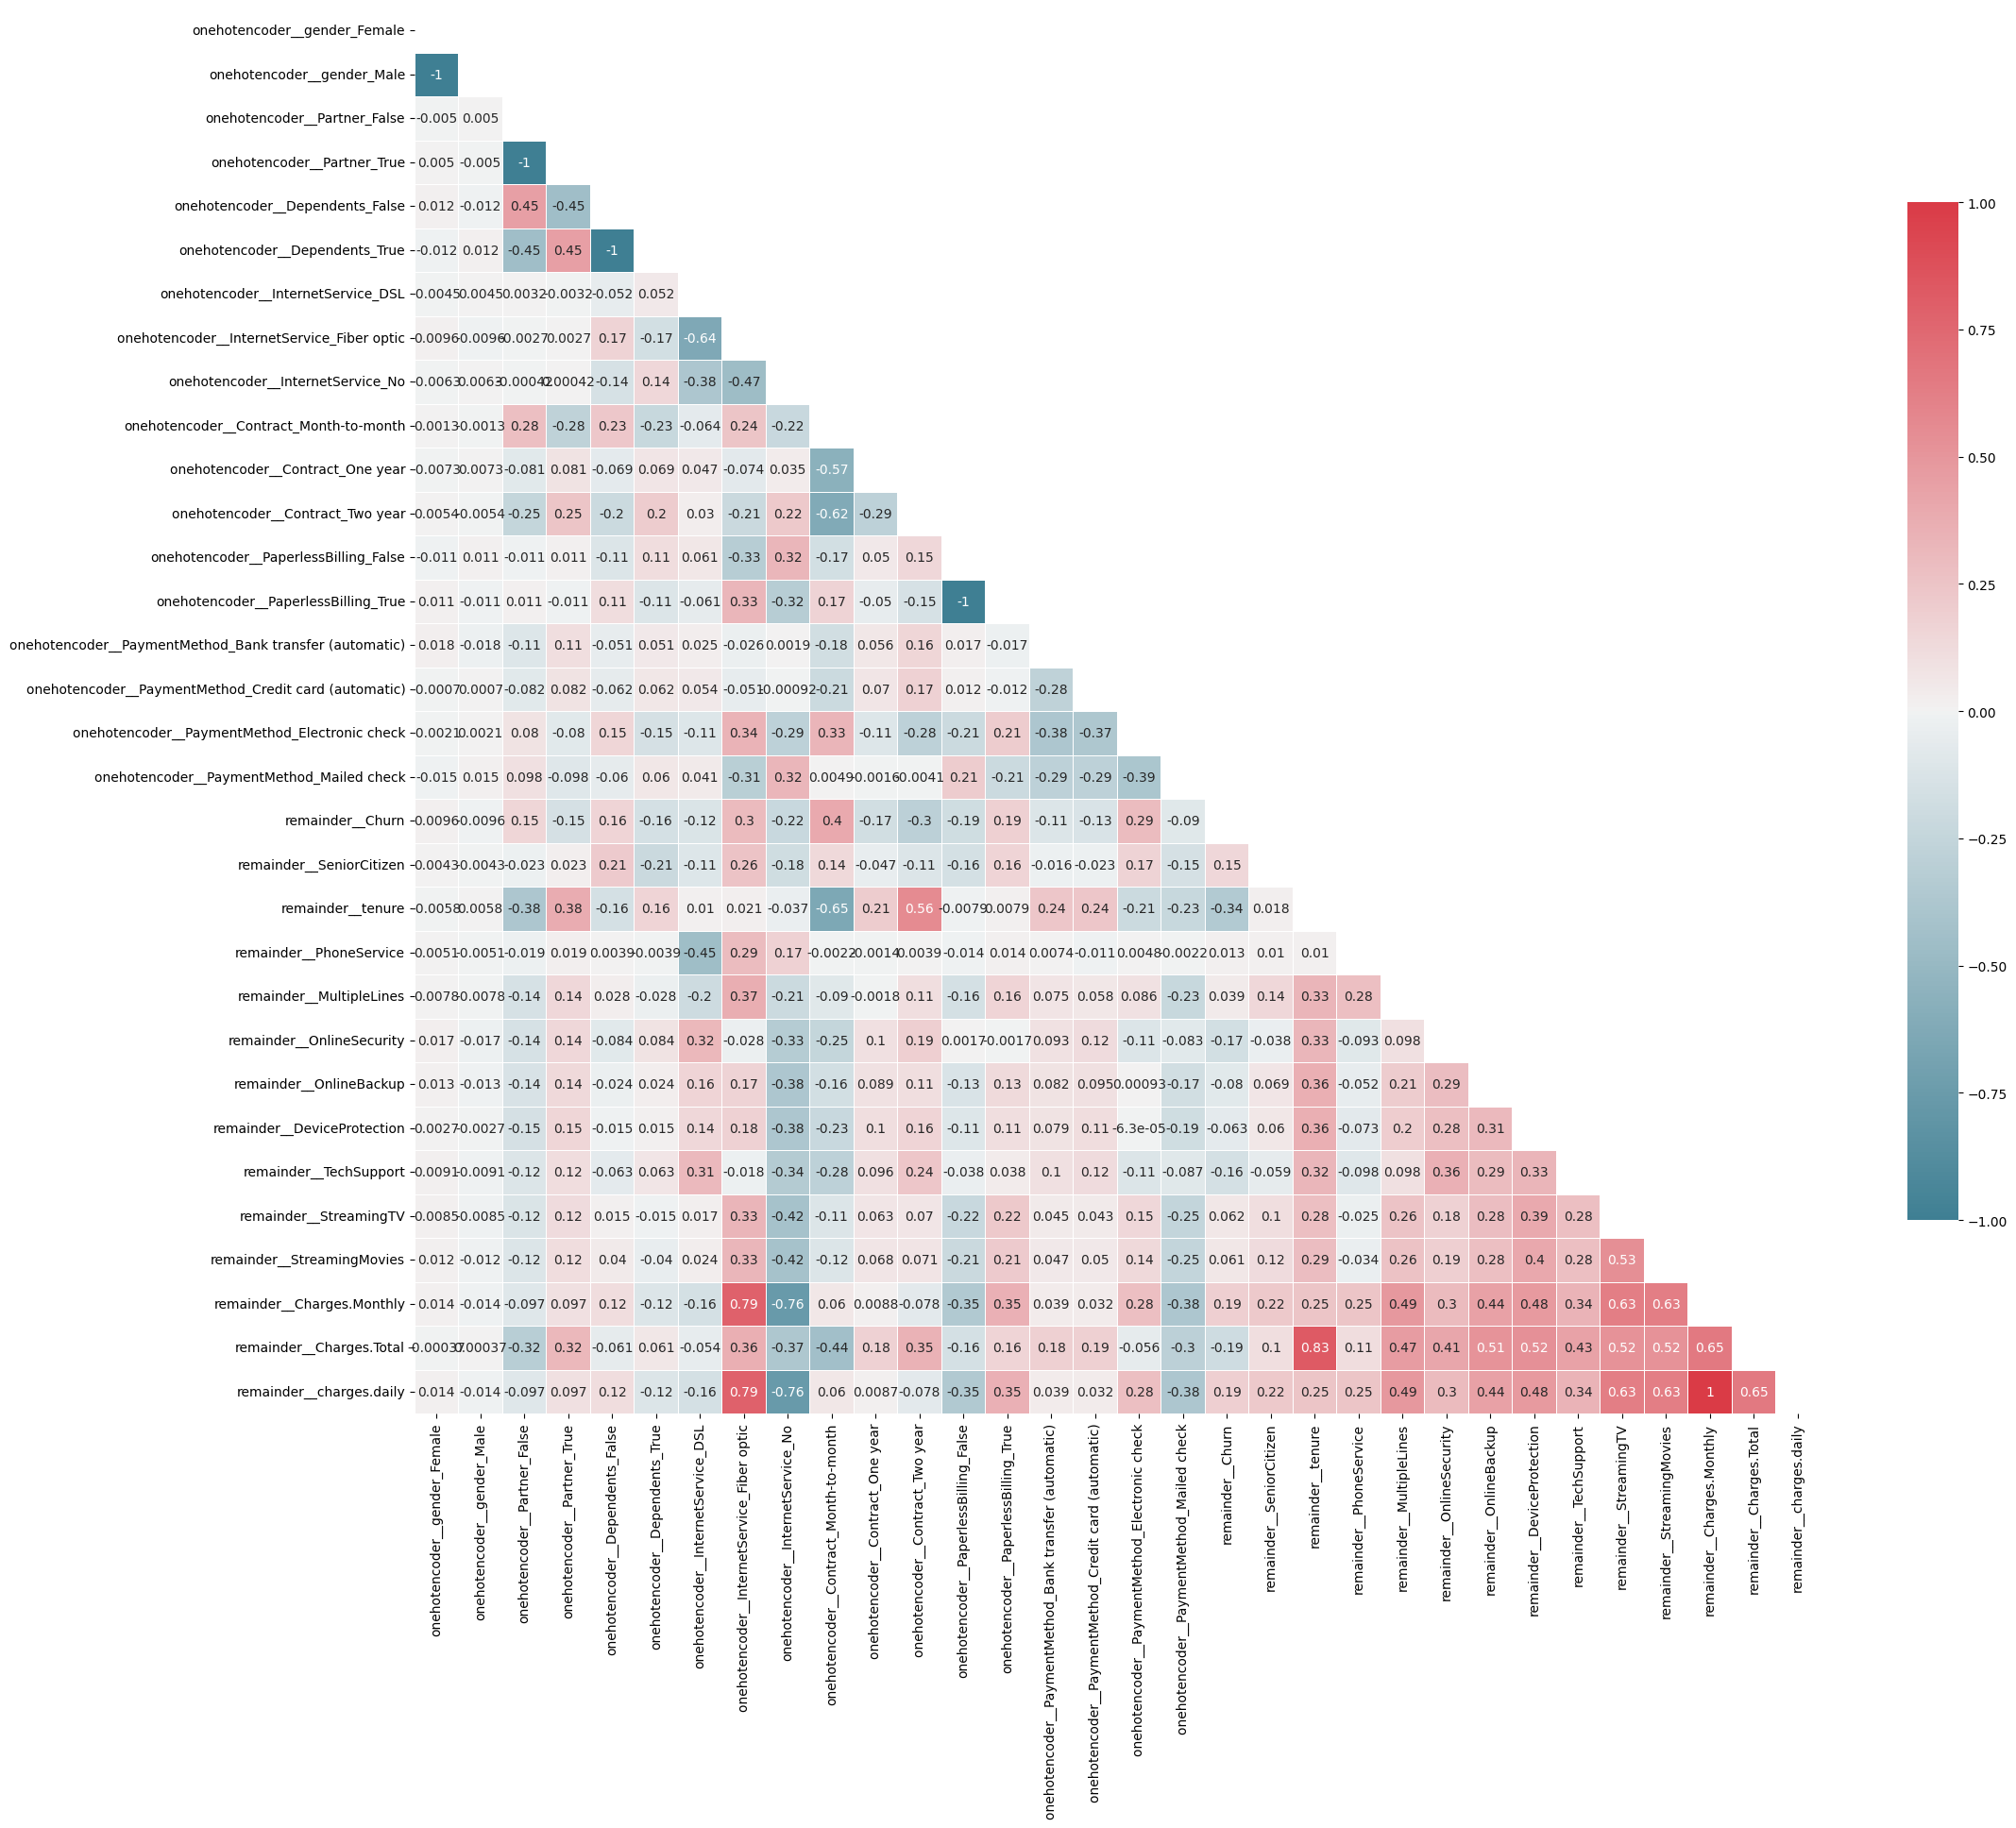

In [122]:
correlate = df_OneHotEncoder.corr()

mascara = np.zeros_like(correlate, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(24, 28))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(correlate, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

plt.show()

📊 Correlación con Churn:
remainder__Churn                                          1.000000
onehotencoder__Contract_Month-to-month                    0.395584
onehotencoder__InternetService_Fiber optic                0.300949
onehotencoder__PaymentMethod_Electronic check             0.294626
remainder__charges.daily                                  0.189918
remainder__Charges.Monthly                                0.189866
onehotencoder__PaperlessBilling_True                      0.186666
onehotencoder__Dependents_False                           0.161384
onehotencoder__Partner_False                              0.148546
remainder__SeniorCitizen                                  0.146733
remainder__StreamingTV                                    0.062430
remainder__StreamingMovies                                0.060586
remainder__MultipleLines                                  0.039343
remainder__PhoneService                                   0.012571
onehotencoder__gender_Female         

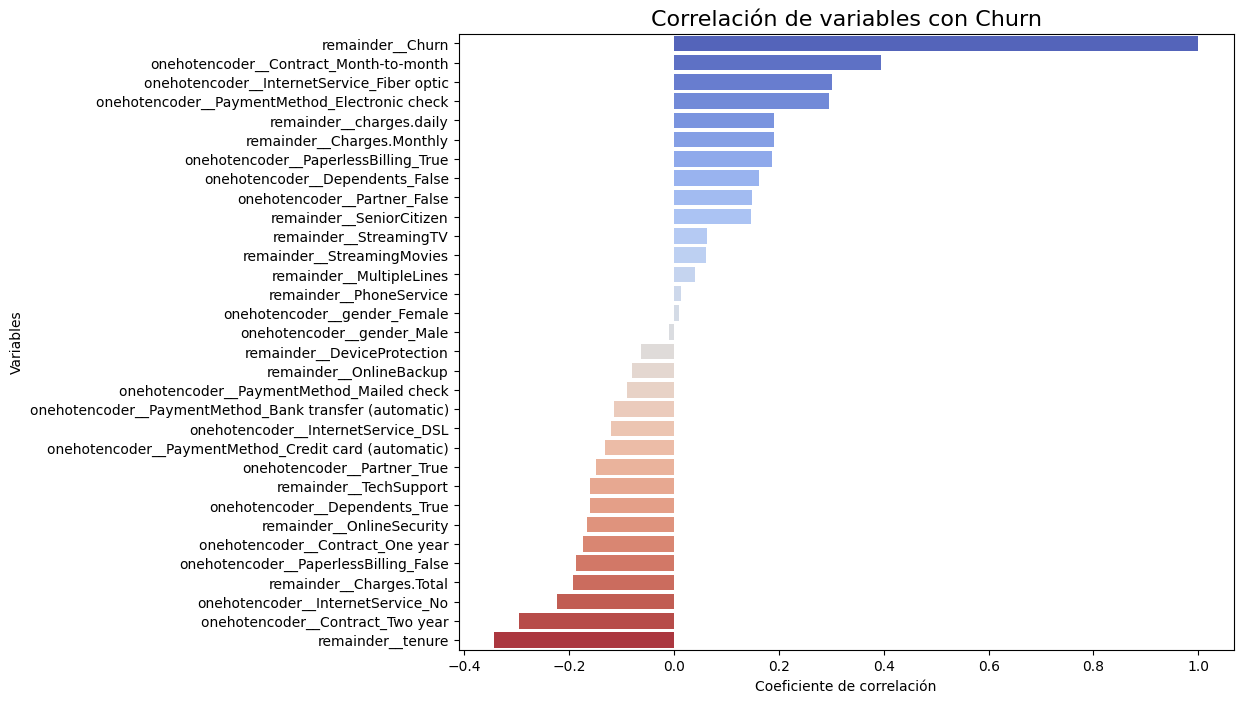

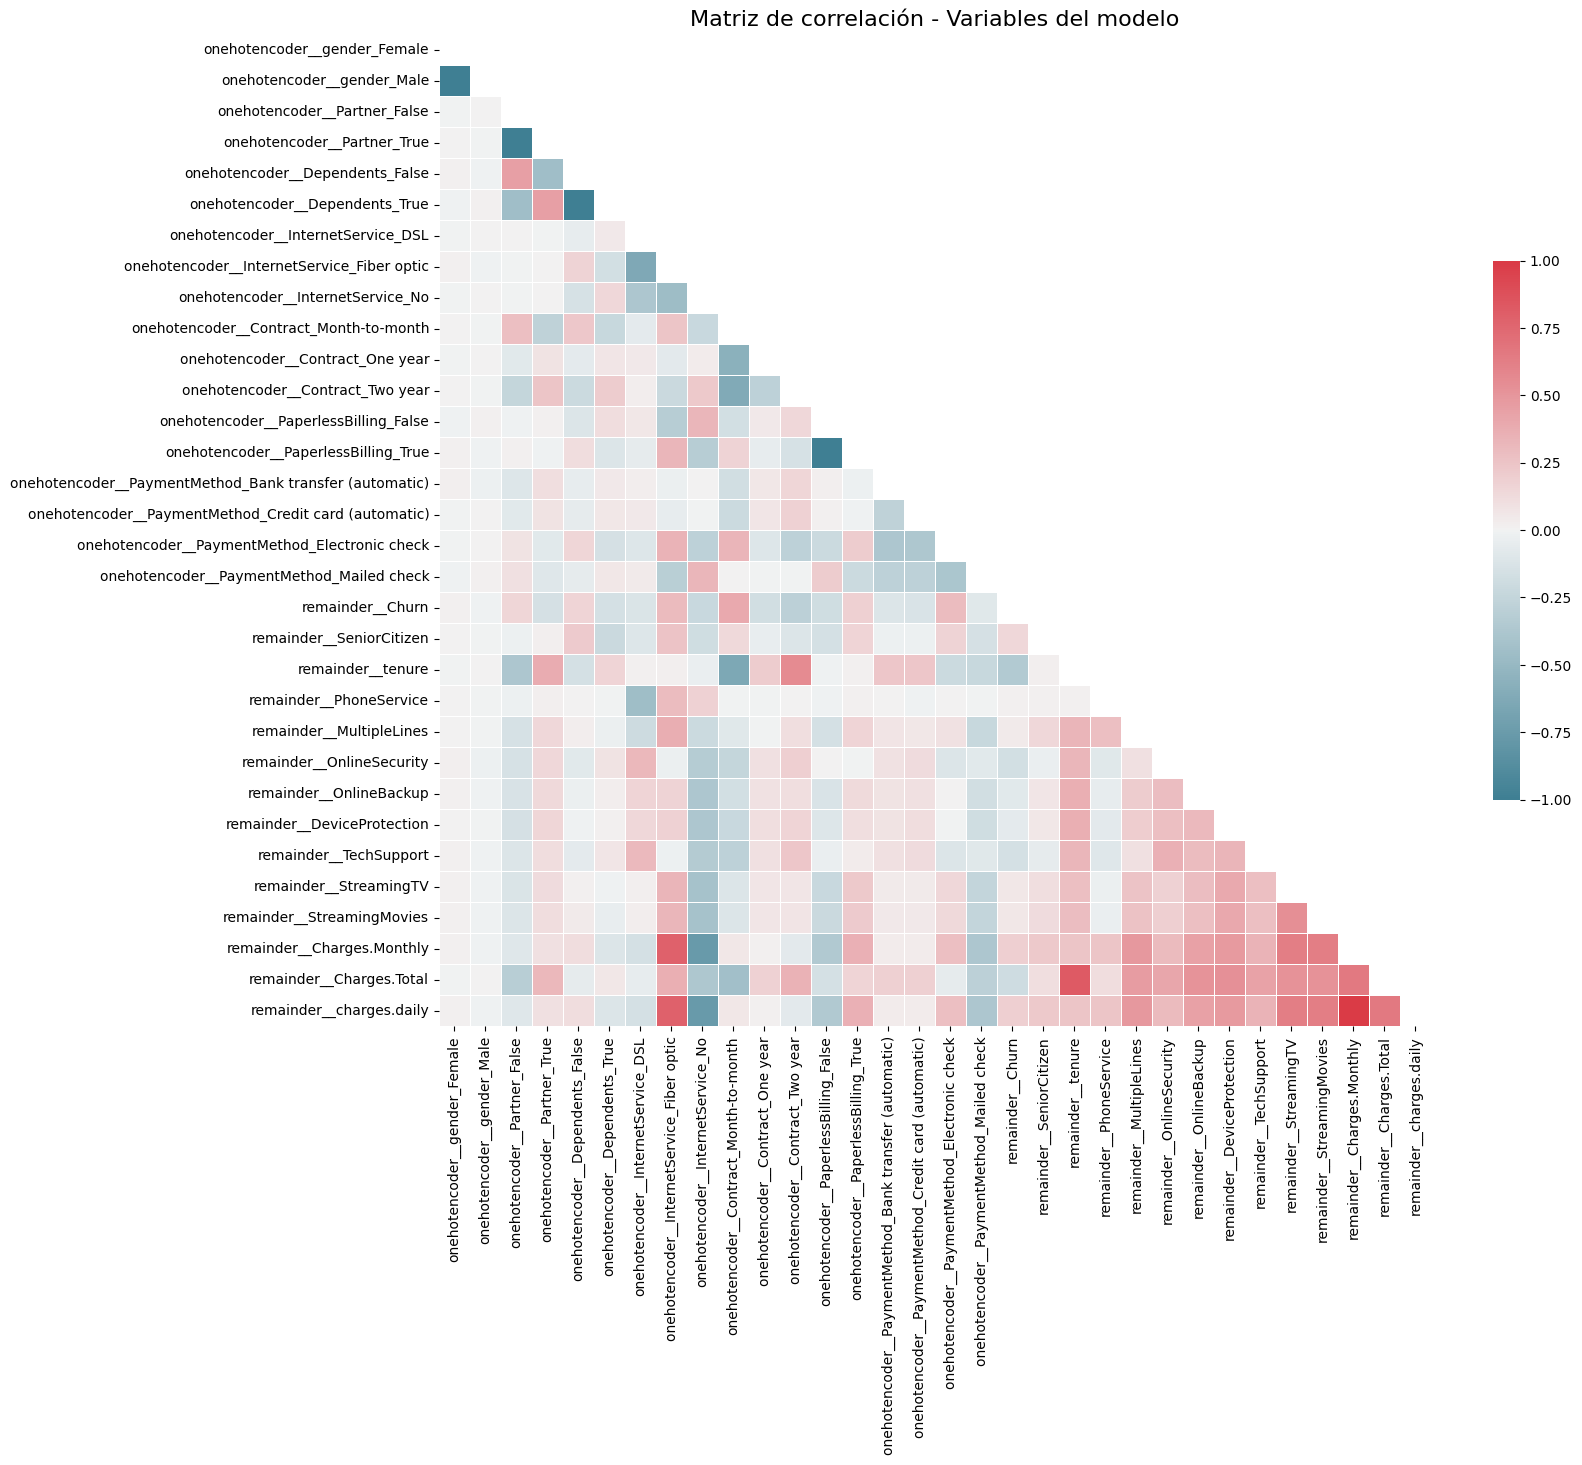

In [123]:
correlacion_churn = df_OneHotEncoder.corr()["remainder__Churn"].sort_values(ascending=False)

# Mostrar tabla de correlaciones en consola
print("📊 Correlación con Churn:")
print(correlacion_churn)

# Gráfico de barras con correlación de Churn
plt.figure(figsize=(10, 8))
sns.barplot(x=correlacion_churn.values, y=correlacion_churn.index, palette="coolwarm")
plt.title("Correlación de variables con Churn", fontsize=16)
plt.xlabel("Coeficiente de correlación")
plt.ylabel("Variables")
plt.show()

# ============================
# 2. HEATMAP COMPLETO
# ============================
correlate = df_OneHotEncoder.corr()

# Crea máscara para triángulo superior
mascara = np.zeros_like(correlate, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Genera el heatmap
f, ax = plt.subplots(figsize=(16, 14))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(
    correlate,
    mask=mascara,
    cmap=cmap,
    vmax=1, vmin=-1, center=0,
    square=True, linewidths=.5, annot=False,
    cbar_kws={"shrink": .5}
)

plt.title("Matriz de correlación - Variables del modelo", fontsize=16)
plt.show()

📊 Correlación con Churn:
remainder__Churn                                          1.000000
onehotencoder__Contract_Month-to-month                    0.395584
onehotencoder__InternetService_Fiber optic                0.300949
onehotencoder__PaymentMethod_Electronic check             0.294626
remainder__charges.daily                                  0.189918
remainder__Charges.Monthly                                0.189866
onehotencoder__PaperlessBilling_True                      0.186666
onehotencoder__Dependents_False                           0.161384
onehotencoder__Partner_False                              0.148546
remainder__SeniorCitizen                                  0.146733
remainder__StreamingTV                                    0.062430
remainder__StreamingMovies                                0.060586
remainder__MultipleLines                                  0.039343
remainder__PhoneService                                   0.012571
onehotencoder__gender_Female         

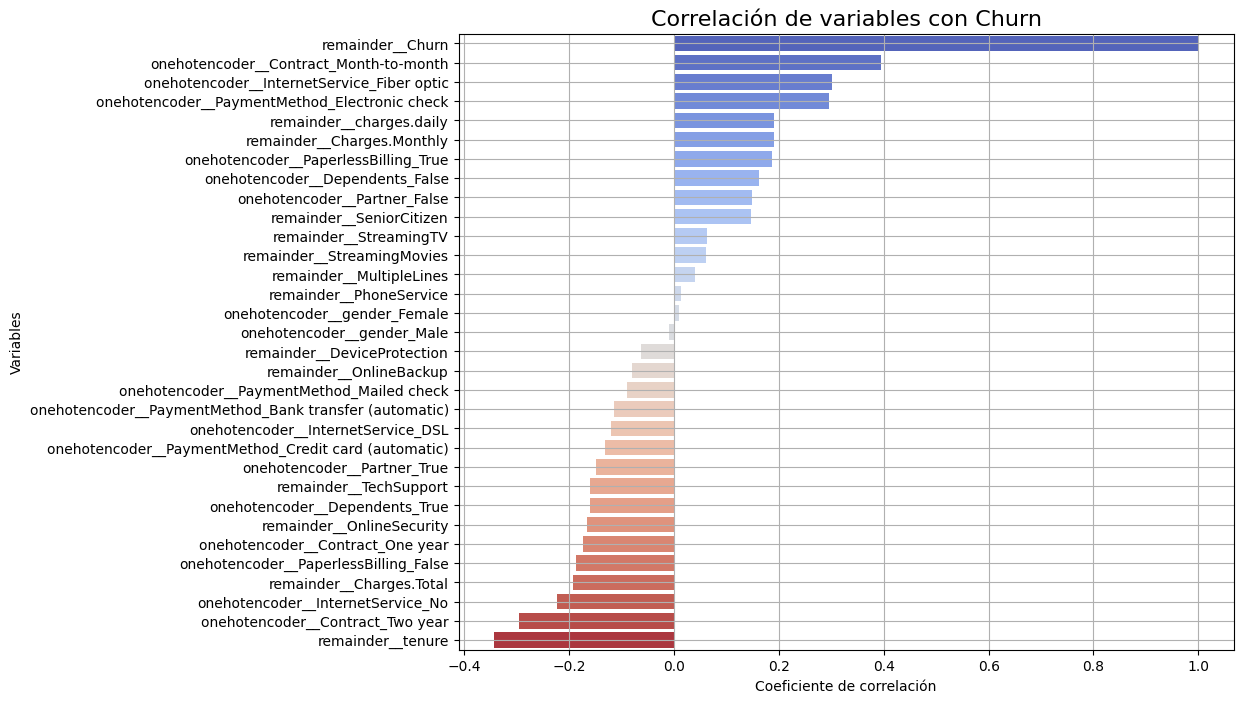

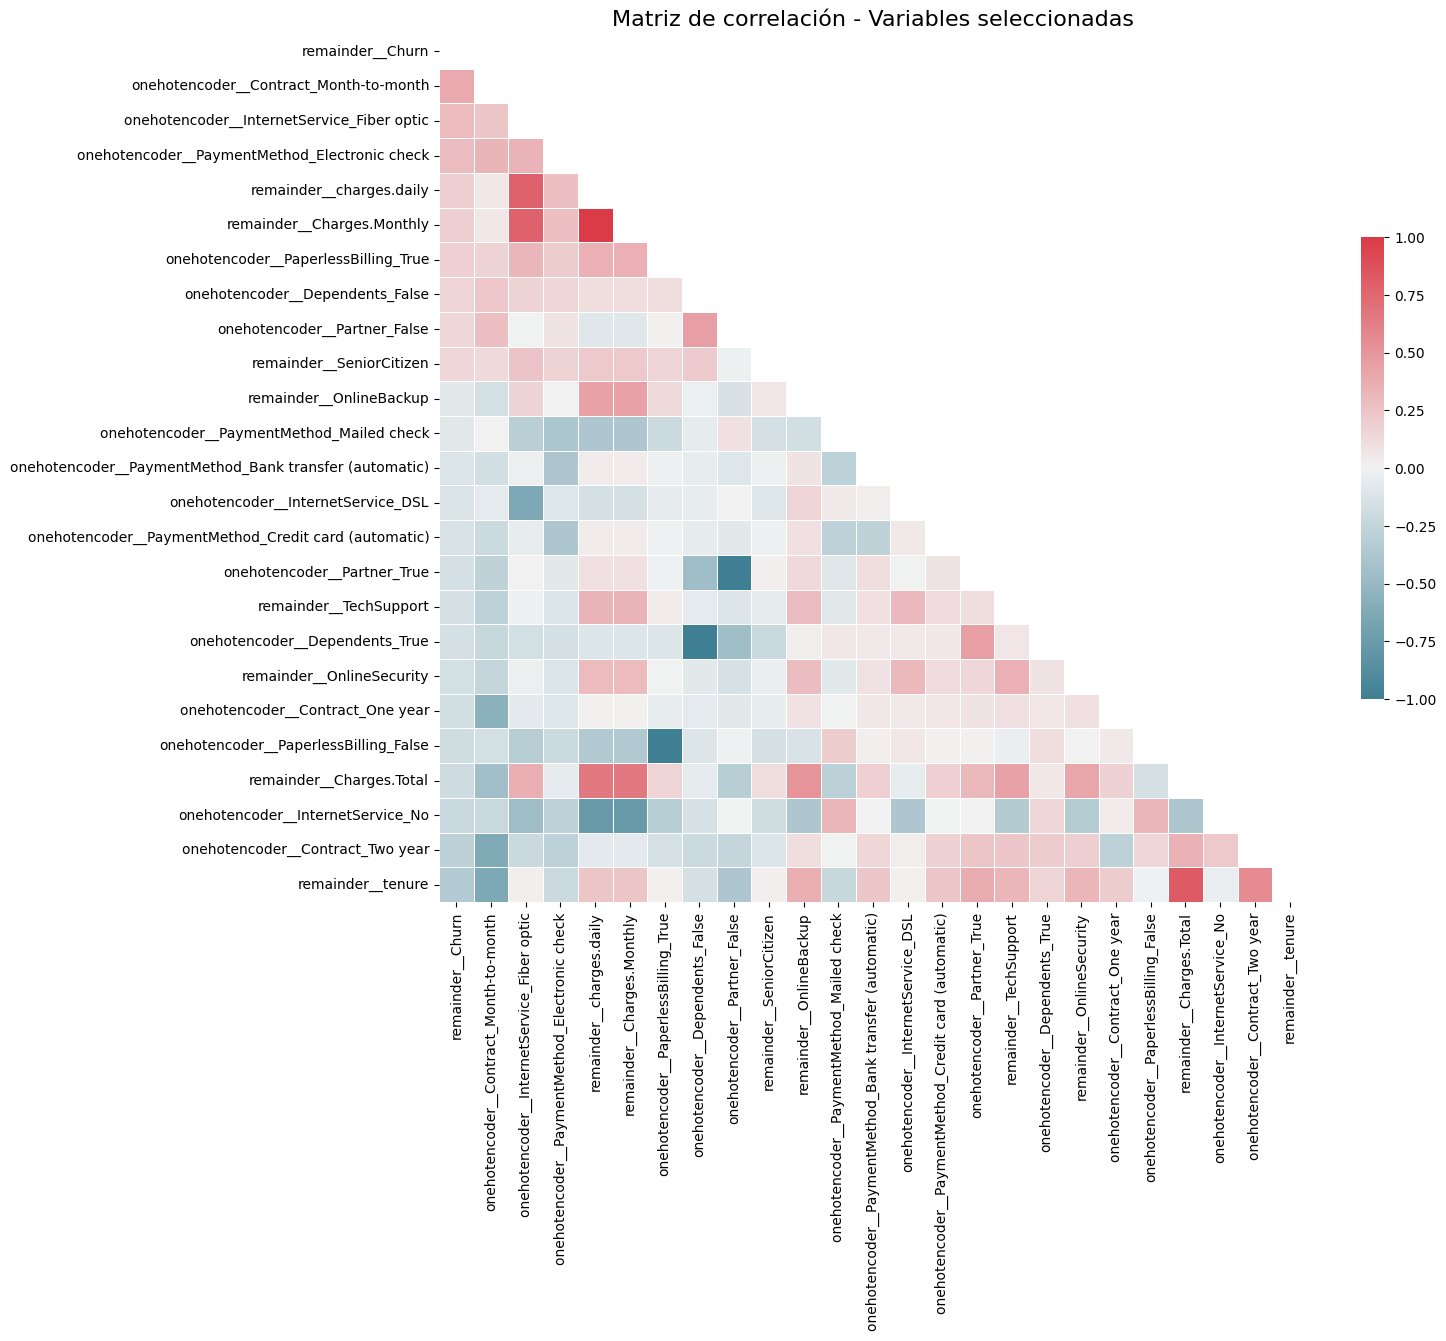

remainder__Churn onehotencoder__Contract_Month-to-month  \
0               False                                    0.0   
1               False                                    1.0   
2                True                                    1.0   
3                True                                    1.0   
4                True                                    1.0   
...               ...                                    ...   
7262            False                                    0.0   
7263             True                                    1.0   
7264            False                                    1.0   
7265            False                                    0.0   
7266            False                                    0.0   

     onehotencoder__InternetService_Fiber optic  \
0                                           0.0   
1                                           0.0   
2                                           1.0   
3                                           1.0   
4                                           1.0   
...                                         ...   
7262                                        0.0   
7263                                        1.0   
7264                                        0.0   
7265                                        0.0   
7266                                        0.0   

     onehotencoder__PaymentMethod_Electronic check remainder__charges.daily  \
0                                              0.0                     2.19   
1                                              0.0                      2.0   
2                                              1.0                     2.46   
3                                              1.0                     3.27   
4                                              0.0                      2.8   
...                                            ...                      ...   
7262                                           0.0                     1.84   
7263                                           1.0                     2.84   
7264                                           0.0                     1.68   
7265                                           0.0                     2.26   
7266                                           1.0                     1.97   

     remainder__Charges.Monthly onehotencoder__PaperlessBilling_True  \
0                          65.6                                  1.0   
1                          59.9                                  0.0   
2                          73.9                                  1.0   
3                          98.0                                  1.0   
4                          83.9                                  1.0   
...                         ...                                  ...   
7262                      55.15                                  0.0   
7263                       85.1                                  1.0   
7264                       50.3                                  1.0   
7265                      67.85                                  0.0   
7266                       59.0                                  0.0   

     onehotencoder__Dependents_False onehotencoder__Partner_False  \
0                                0.0                          0.0   
1                                1.0                          1.0   
2                                1.0                          1.0   
3                                1.0                          0.0   
4                                1.0                          0.0   
...                              ...                          ...   
7262                             1.0                          1.0   
7263                             1.0                          0.0   
7264                             1.0                          1.0   
7265                             0.0                          0.0   
7266                             0.0              

In [124]:
# ============================
# 1. CORRELACIÓN SOLO CON CHURN
# ============================
correlacion_churn = df_OneHotEncoder.corr()["remainder__Churn"].sort_values(ascending=False)

# Muestra las correlaciones
print("📊 Correlación con Churn:")
print(correlacion_churn)

# ============================
# 2. FILTRAR  LAS VARIABLES POCO RELEVANTES
# ============================
umbral = 0.07 # Valor mínimo absoluto de correlación
var_relevantes = correlacion_churn[abs(correlacion_churn) >= umbral].index.tolist()

# Asegurar que Churn se quede en el dataset
if "remainder__Churn" not in var_relevantes:
    var_relevantes.append("remainder__Churn")

print(f"\n✅ Variables seleccionadas (|corr| >= {umbral}):")
print(var_relevantes)

# Dataset reducido
df_reducido = df_OneHotEncoder[var_relevantes]

# ============================
# 3. GRÁFICO DE BARRAS CON CORRELACIÓN
# ============================
plt.figure(figsize=(10, 8))
sns.barplot(x=correlacion_churn.values, y=correlacion_churn.index, palette="coolwarm")
plt.title("Correlación de variables con Churn", fontsize=16)
plt.xlabel("Coeficiente de correlación")
plt.ylabel("Variables")
plt.grid()
plt.show()

# ============================
# 4. HEATMAP DE SOLO VARIABLES RELEVANTES
# ============================
correlate = df_reducido.corr()

mascara = np.zeros_like(correlate, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

f, ax = plt.subplots(figsize=(14, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(
    correlate,
    mask=mascara,
    cmap=cmap,
    vmax=1, vmin=-1, center=0,
    square=True, linewidths=.5, annot=False,
    cbar_kws={"shrink": .5}
)

plt.title("Matriz de correlación - Variables seleccionadas", fontsize=16)
plt.show()

df_reducido

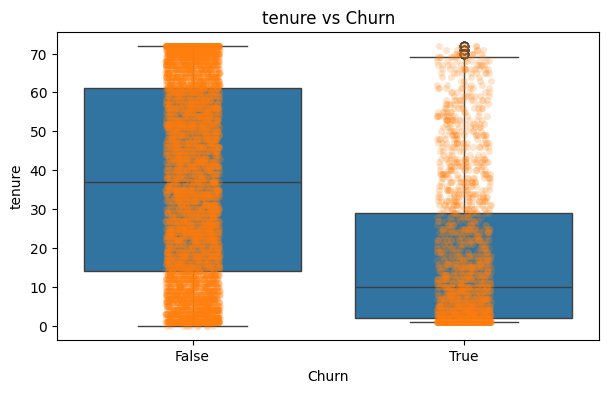

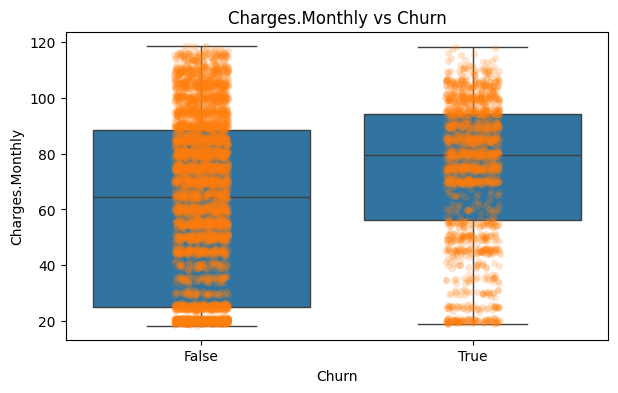

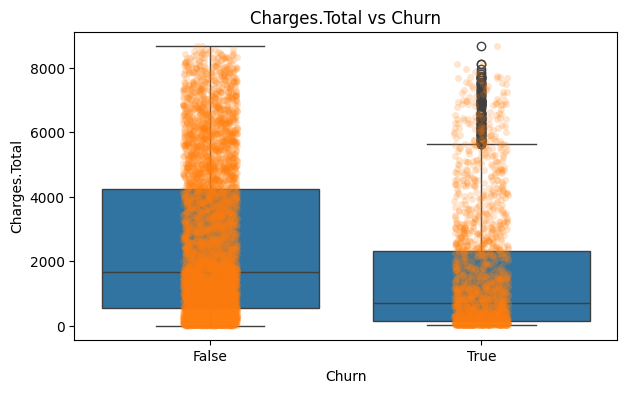

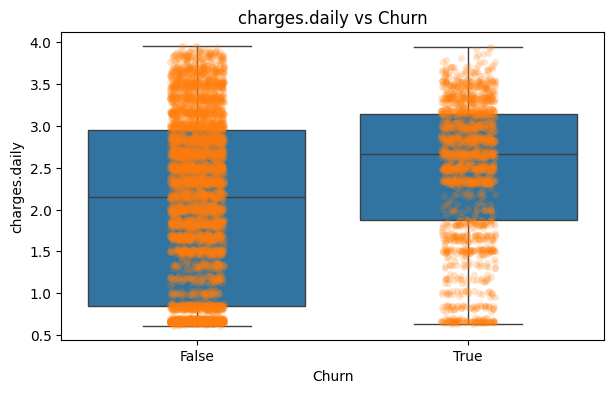

In [125]:
num_cols = ["tenure", "Charges.Monthly", "Charges.Total", "charges.daily"]

for col in num_cols:
    plt.figure(figsize=(7,4))
    sns.boxplot(data=df, x="Churn", y=col)
    sns.stripplot(data=df, x="Churn", y=col, alpha=0.2, dodge=True)
    plt.title(f"{col} vs Churn")
    plt.show()


Los clientes que cancelaron (True) tienden a tener cobros mensuales más altos que los que permanecieron (False).

La mancha más concentrada en la parte superior derecha indica que hay una gran densidad de clientes con cobros altos que cancelaron.

Los clientes con cobros bajos parecen estar más en el grupo que no canceló.


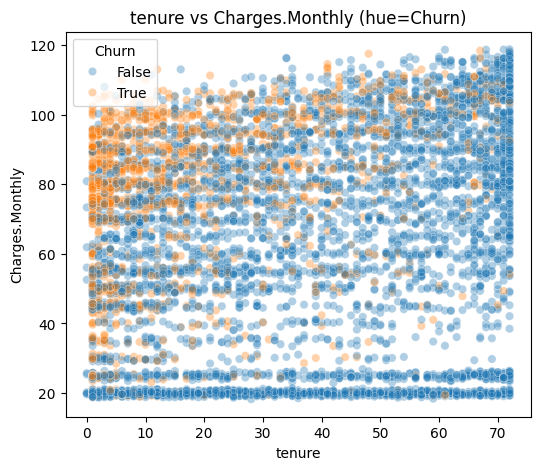

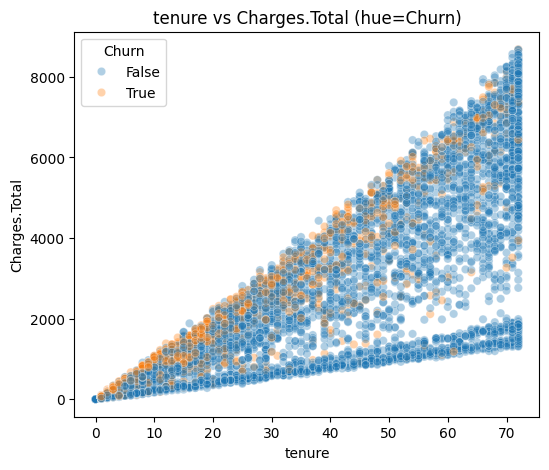

In [126]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x="tenure", y="Charges.Monthly", hue="Churn", alpha=0.35)
plt.title("tenure vs Charges.Monthly (hue=Churn)")
plt.show()

plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x="tenure", y="Charges.Total", hue="Churn", alpha=0.35)
plt.title("tenure vs Charges.Total (hue=Churn)")
plt.show()




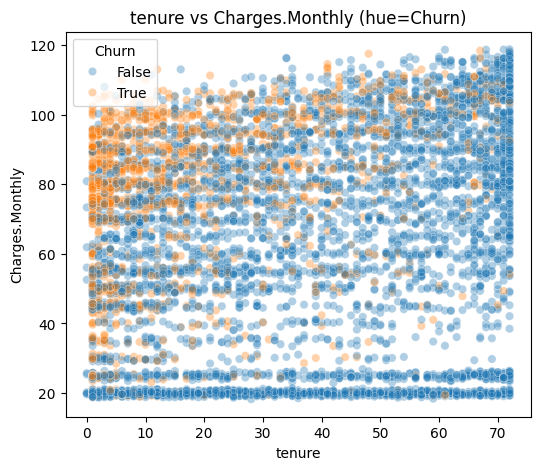

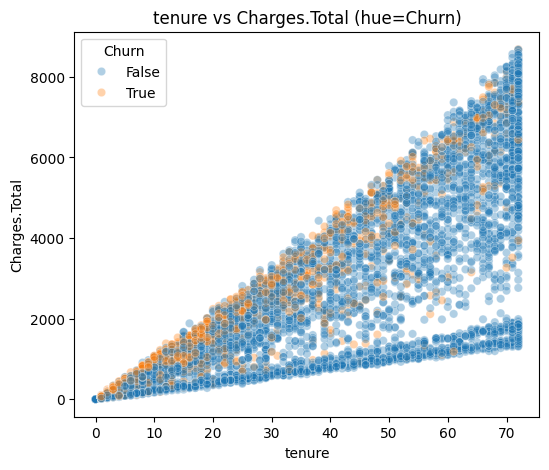

In [127]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x="tenure", y="Charges.Monthly", hue="Churn", alpha=0.35)
plt.title("tenure vs Charges.Monthly (hue=Churn)")
plt.show()

plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x="tenure", y="Charges.Total", hue="Churn", alpha=0.35)
plt.title("tenure vs Charges.Total (hue=Churn)")
plt.show()


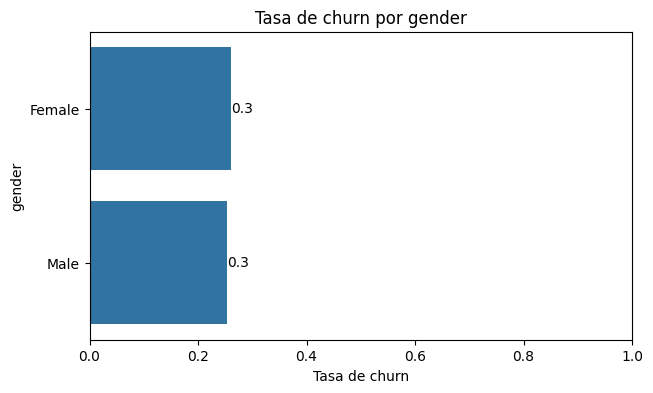

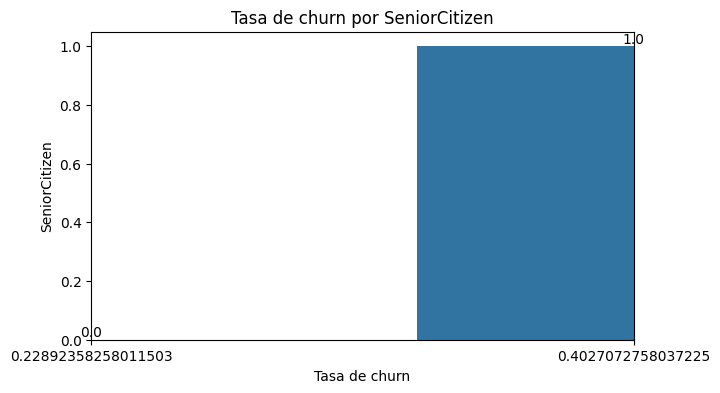

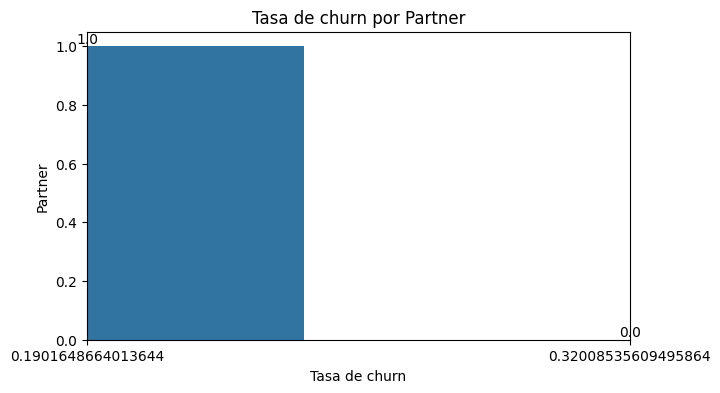

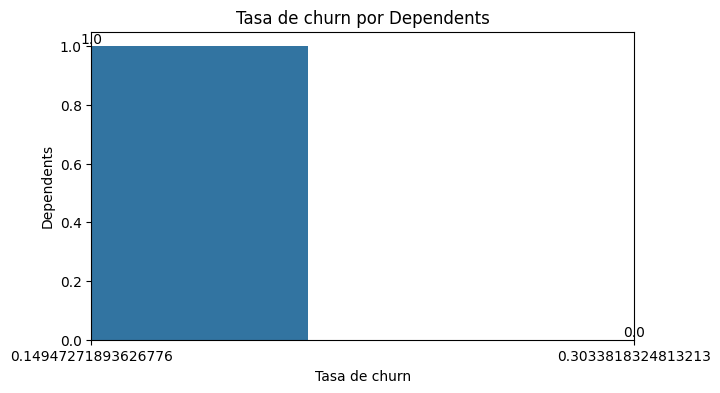

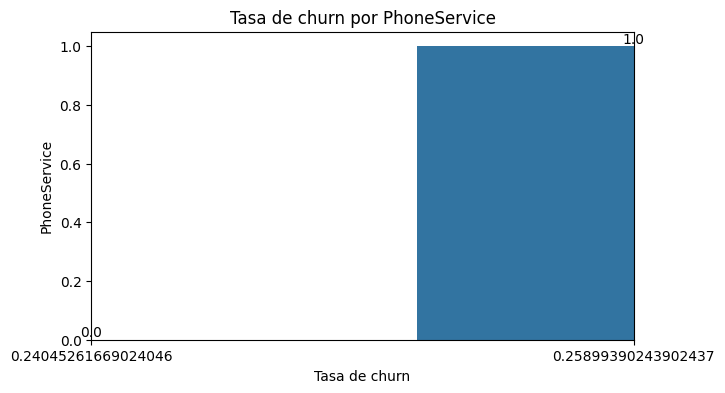

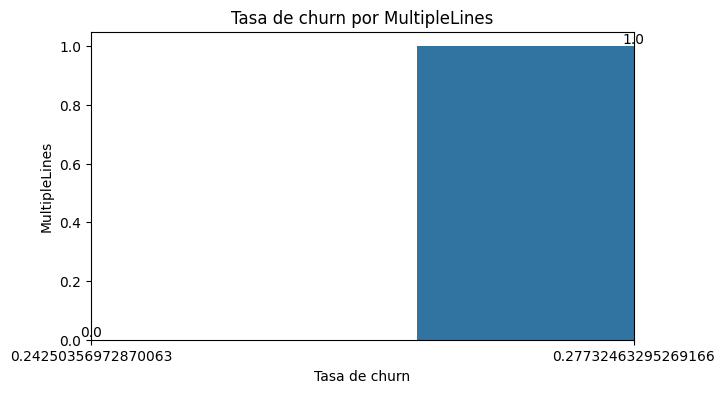

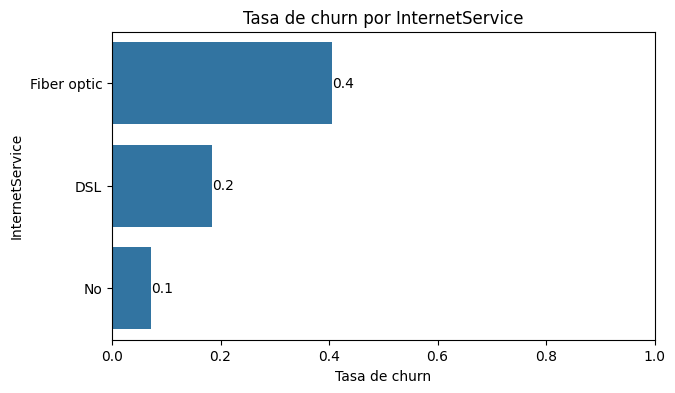

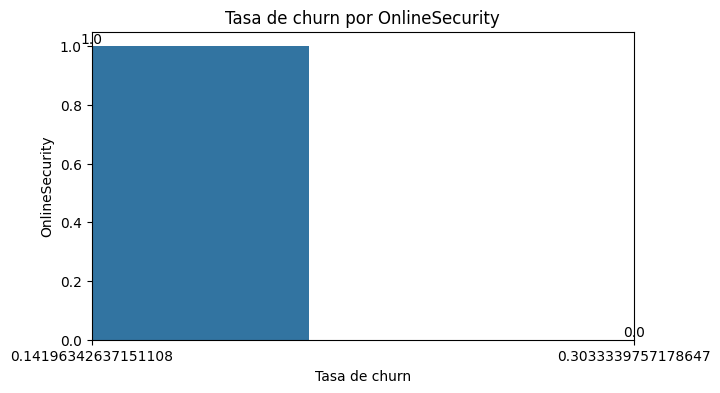

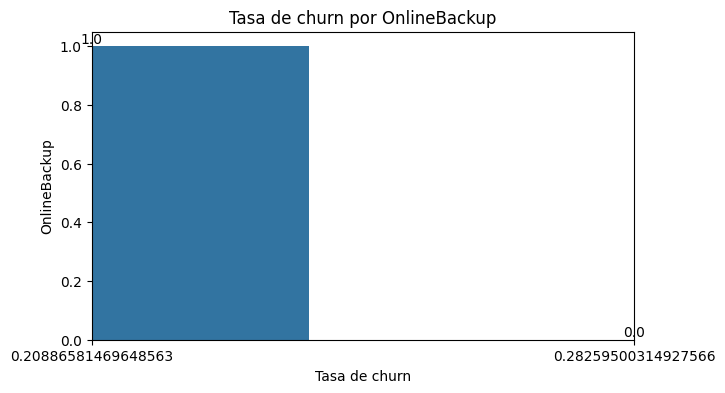

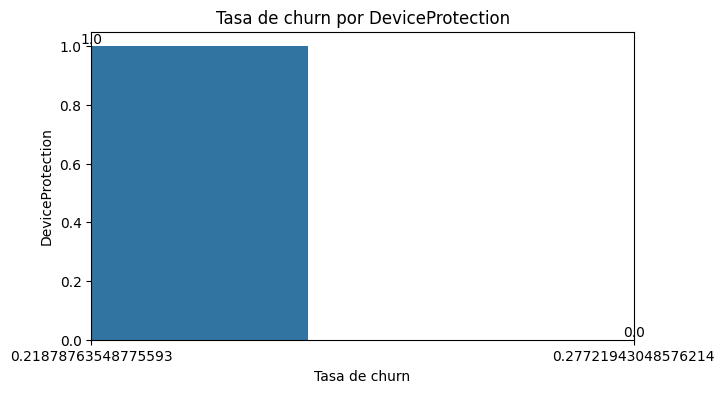

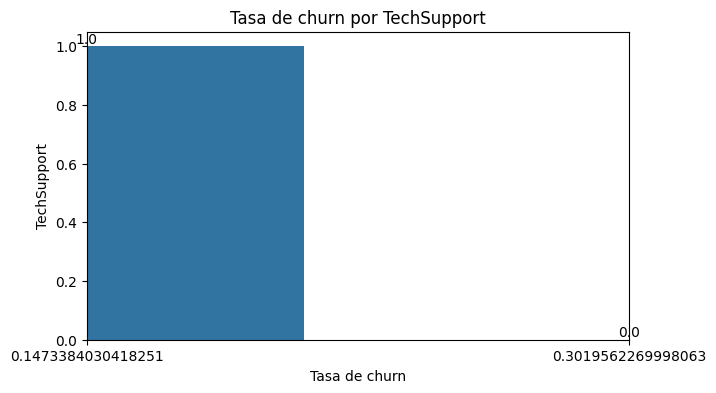

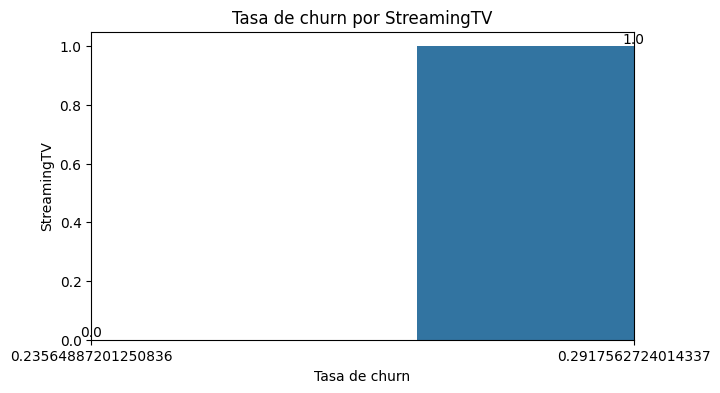

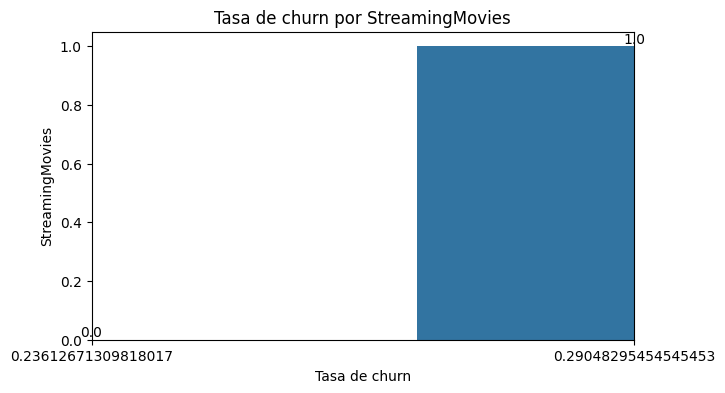

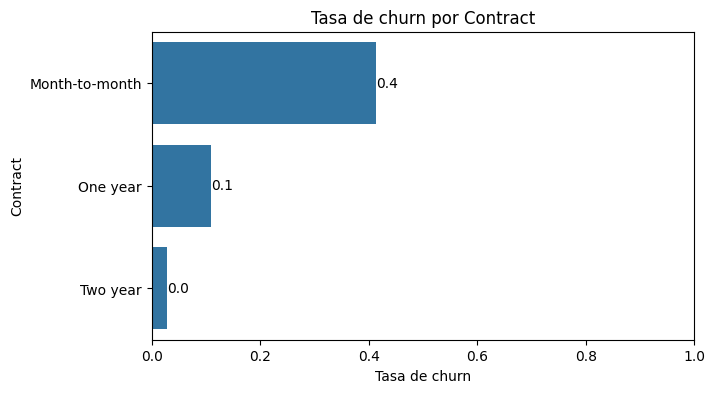

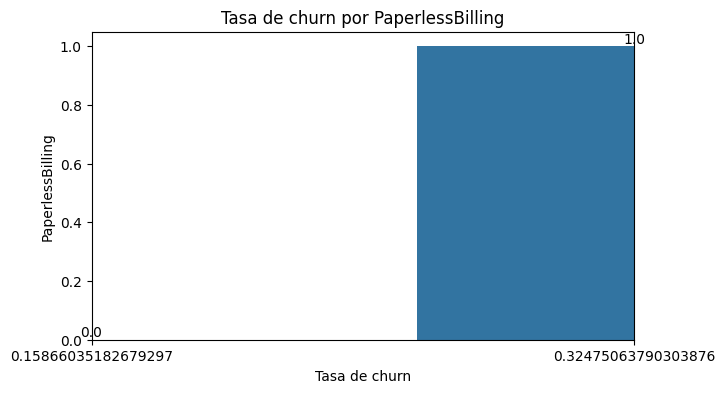

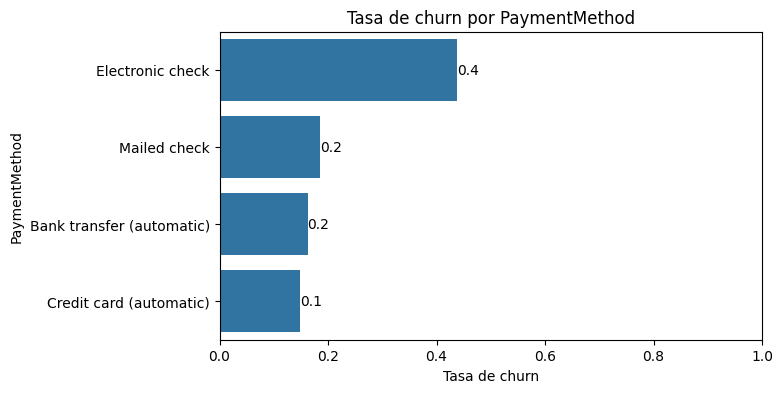

In [128]:
def churn_rate_barplot(df, col, top_n=None):
    tmp = (df.groupby(col)["Churn"]
             .mean()
             .sort_values(ascending=False)
             .rename("churn_rate")
             .reset_index())
    if top_n: tmp = tmp.head(top_n)
    plt.figure(figsize=(7,4))
    ax = sns.barplot(data=tmp, x="churn_rate", y=col)
    ax.bar_label(ax.containers[0], fmt="%.1f")
    plt.xlim(0, 1)
    plt.title(f"Tasa de churn por {col}")
    plt.xlabel("Tasa de churn")
    plt.show()
    return tmp

cat_cols = [
    "gender","SeniorCitizen","Partner","Dependents",
    "PhoneService","MultipleLines","InternetService","OnlineSecurity",
    "OnlineBackup","DeviceProtection","TechSupport","StreamingTV",
    "StreamingMovies","Contract","PaperlessBilling","PaymentMethod"
]

resumen_cat = {}
for c in cat_cols:
    resumen_cat[c] = churn_rate_barplot(df, c)


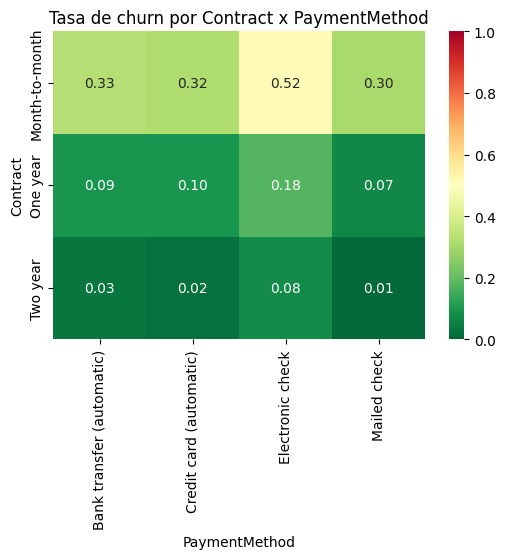

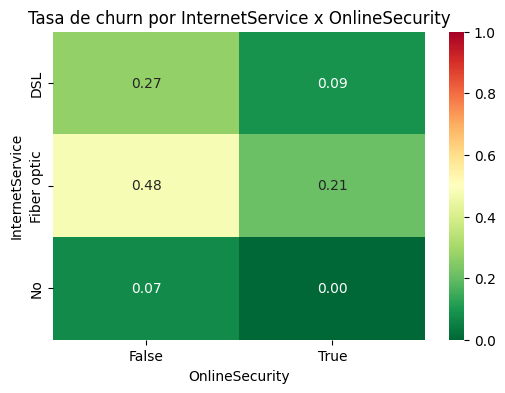

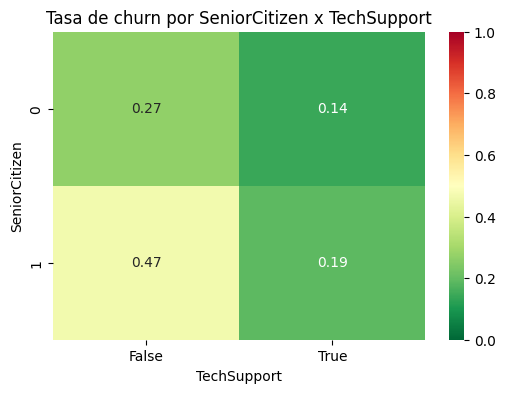

TechSupport       False     True 
SeniorCitizen                    
0              0.266761  0.141221
1              0.466009  0.188889

In [129]:
def churn_pivot_heatmap(df, rows, cols):
    piv = pd.crosstab(df[rows], df[cols], df["Churn"], aggfunc="mean").fillna(0)
    plt.figure(figsize=(6,4))
    sns.heatmap(piv, annot=True, fmt=".2f", vmin=0, vmax=1, cmap="RdYlGn_r")
    plt.title(f"Tasa de churn por {rows} x {cols}")
    plt.ylabel(rows); plt.xlabel(cols)
    plt.show()
    return piv

churn_pivot_heatmap(df, "Contract", "PaymentMethod")
churn_pivot_heatmap(df, "InternetService", "OnlineSecurity")
churn_pivot_heatmap(df, "SeniorCitizen", "TechSupport")


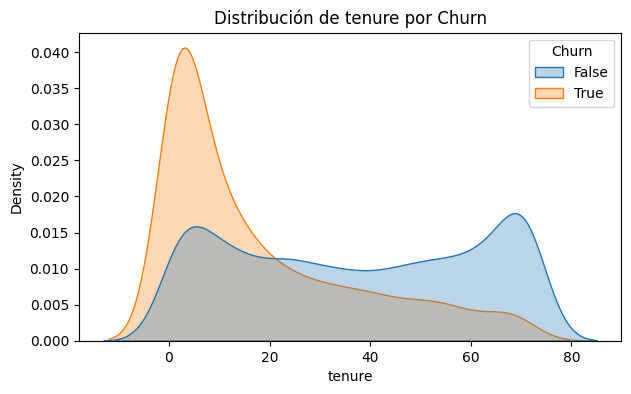

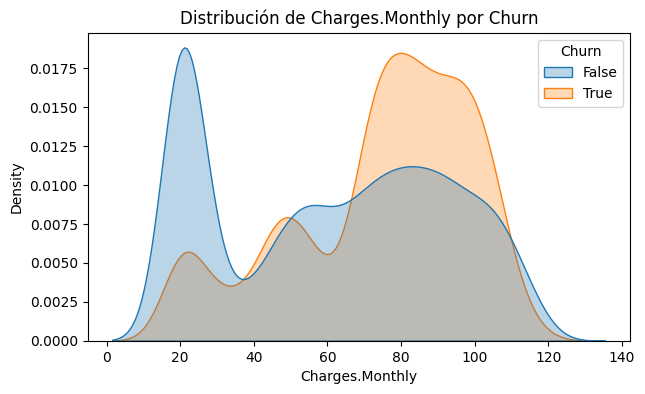

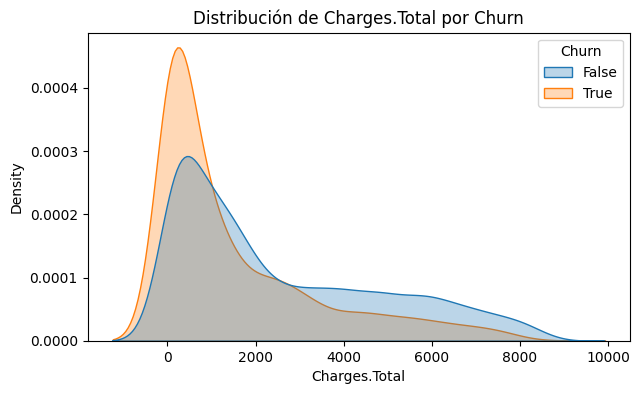

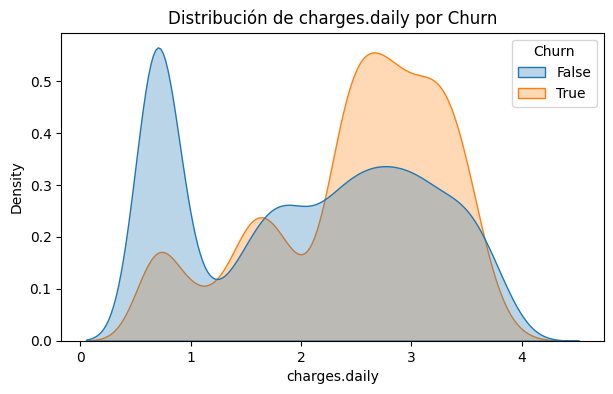

In [130]:
for col in num_cols:
    plt.figure(figsize=(7,4))
    sns.kdeplot(data=df, x=col, hue="Churn", common_norm=False, fill=True, alpha=0.3)
    plt.title(f"Distribución de {col} por Churn")
    plt.show()


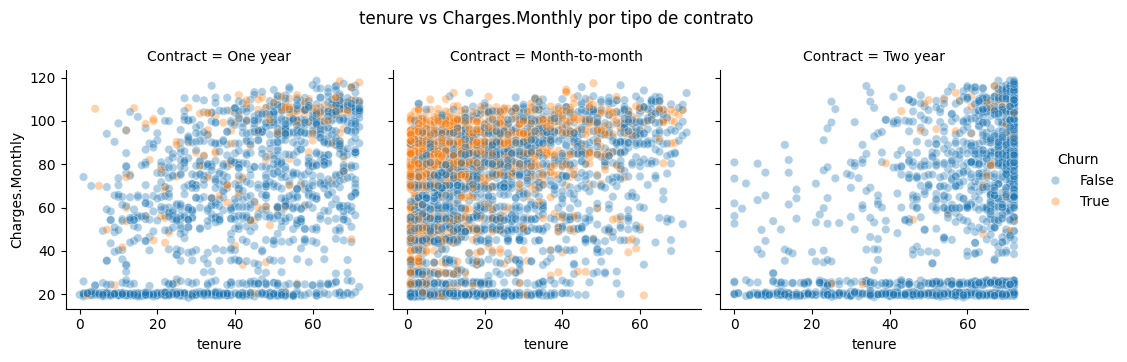

In [131]:
sns.relplot(
    data=df, x="tenure", y="Charges.Monthly", hue="Churn",
    col="Contract", kind="scatter", col_wrap=3, height=3.5, alpha=0.35
)
plt.subplots_adjust(top=0.85)
plt.suptitle("tenure vs Charges.Monthly por tipo de contrato", y=1.02)
plt.show()


📊 Conteo de clientes por clase:
Churn
False    5398
True     1869
Name: count, dtype: int64

📈 Proporción de clientes por clase (%):
Churn
False    74.280996
True     25.719004
Name: proportion, dtype: float64


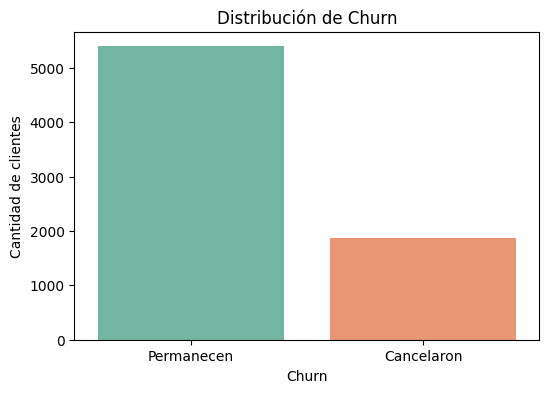


⚠ Existe desbalance en las clases. Podría requerir técnicas de balanceo como SMOTE o undersampling.


In [132]:
# Cuenta la cantidad de clientes en cada clase
conteo_clases = df["Churn"].value_counts()

# Calcula la proporción
proporcion_clases = df["Churn"].value_counts(normalize=True) * 100

print("📊 Conteo de clientes por clase:")
print(conteo_clases)

print("\n📈 Proporción de clientes por clase (%):")
print(proporcion_clases)



plt.figure(figsize=(6,4))
sns.barplot(x=conteo_clases.index, y=conteo_clases.values, palette="Set2")
plt.xticks([0, 1], ["Permanecen", "Cancelaron"])
plt.ylabel("Cantidad de clientes")
plt.title("Distribución de Churn")
plt.show()

# Evalua el desbalance
umbral_desbalance = 0.4  # Si alguna clase es menor al 40% del total, se considera desbalanceada
if proporcion_clases.min() < umbral_desbalance * 100:
    print("\n⚠ Existe desbalance en las clases. Podría requerir técnicas de balanceo como SMOTE o undersampling.")
else:
    print("\n✅ No hay desbalance significativo entre las clases.")


**BALANCEO CON SMOTE**

In [133]:
df_reducido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   remainder__Churn                                        7267 non-null   object
 1   onehotencoder__Contract_Month-to-month                  7267 non-null   object
 2   onehotencoder__InternetService_Fiber optic              7267 non-null   object
 3   onehotencoder__PaymentMethod_Electronic check           7267 non-null   object
 4   remainder__charges.daily                                7267 non-null   object
 5   remainder__Charges.Monthly                              7267 non-null   object
 6   onehotencoder__PaperlessBilling_True                    7267 non-null   object
 7   onehotencoder__Dependents_False                         7267 non-null   object
 8   onehotencoder__Partner_False                    

In [134]:
# Convierte todas las columnas a numericos
df_reducido = df_reducido.apply(pd.to_numeric, errors='coerce')

# elimina cualquier NaNs posible en las filas
df_reducido = df_reducido.dropna()

# Separa variables independientes (X) y dependiente (y)
X = df_reducido.drop("remainder__Churn", axis=1)
y = df_reducido["remainder__Churn"]

# Convierte la variable objetivo
y = y.astype(int)

# Divide en entrenamiento y prueba antes de balancear
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Aplico SMOTE solo a la info de entrenamiento
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Verificar el balanceo
print("Distribución antes de SMOTE:")
print(y_train.value_counts())

print("\nDistribución después de SMOTE:")
print(y_train_bal.value_counts())

Distribución antes de SMOTE:
remainder__Churn
0    4318
1    1495
Name: count, dtype: int64

Distribución después de SMOTE:
remainder__Churn
0    4318
1    4318
Name: count, dtype: int64


In [135]:


# 1. Identifica las columnas numéricas (excluyendo la variable objetivo)
num_cols_reducido = df_reducido.drop(columns=["remainder__Churn"]).select_dtypes(include=["int64", "float64"]).columns.tolist()

# 2. Inicializa el escalador
scaler = StandardScaler()

# 3. Escala las columnas numéricas
df_reducido_scaled = df_reducido.copy()
df_reducido_scaled[num_cols_reducido] = scaler.fit_transform(df_reducido_scaled[num_cols_reducido])

# 4. Visualiza los primeros datos escalados
print(df_reducido_scaled.head())


   remainder__Churn  onehotencoder__Contract_Month-to-month  \
0             False                               -1.108050   
1             False                                0.902487   
2              True                                0.902487   
3              True                                0.902487   
4              True                                0.902487   

   onehotencoder__InternetService_Fiber optic  \
0                                   -0.886534   
1                                   -0.886534   
2                                    1.127988   
3                                    1.127988   
4                                    1.127988   

   onehotencoder__PaymentMethod_Electronic check  remainder__charges.daily  \
0                                      -0.712075                  0.032567   
1                                      -0.712075                 -0.156613   
2                                       1.404346                  0.301401   
3             

🔹 Modelo 1: Regresión Logística (requiere normalización)

Justificación:
La regresión logística utiliza una función logística para modelar la probabilidad de abandono.
Si las variables tienen escalas muy distintas (ejemplo: “tenure” en meses vs. “Charges.Monthly” en dólares), los coeficientes pueden sesgarse.
Con la normalización/estandarización todas las variables quedan en la misma escala, asegurando que el modelo interprete cada predictor de forma justa.

🔹 Modelo 2: Random Forest (no requiere normalización)

Justificación:
Los árboles de decisión y Random Forest dividen los datos en nodos según umbrales.
Estas divisiones no dependen de la escala, sino de los valores relativos de cada variable.
Por eso no necesitan normalización, lo que los hace muy robustos frente a diferentes tipos de variables.

📌 Resultados - Regresión Logística
              precision    recall  f1-score   support

       False       0.84      0.90      0.87      1620
        True       0.64      0.52      0.57       561

    accuracy                           0.80      2181
   macro avg       0.74      0.71      0.72      2181
weighted avg       0.79      0.80      0.79      2181

📌 Resultados - Random Forest
              precision    recall  f1-score   support

       False       0.83      0.89      0.86      1620
        True       0.61      0.47      0.53       561

    accuracy                           0.79      2181
   macro avg       0.72      0.68      0.70      2181
weighted avg       0.77      0.79      0.78      2181



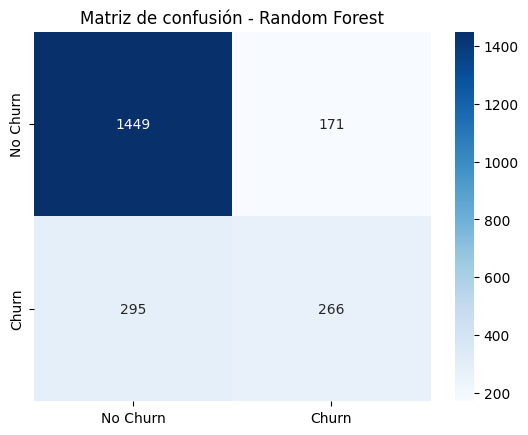

In [136]:

# 1. Separar features y target
# ======================
X = df_reducido_scaled.drop(columns=["remainder__Churn"])
y = df_reducido_scaled["remainder__Churn"]

# ======================
# 2. Dividir en train/test
# ======================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ======================
# 3. Modelo 1: Regresión Logística (con datos normalizados)
# ======================
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("📌 Resultados - Regresión Logística")
print(classification_report(y_test, y_pred_log))

# ======================
# 4. Modelo 2: Random Forest (no requiere normalización)
# ======================
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("📌 Resultados - Random Forest")
print(classification_report(y_test, y_pred_rf))

# ======================
# 5. Matriz de confusión (Random Forest)
# ======================
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn","Churn"], yticklabels=["No Churn","Churn"])
plt.title("Matriz de confusión - Random Forest")
plt.show()


📊 **Comparación
✅ Regresión Logística**

Accuracy (exactitud): 0.80 → Ligeramente mejor que Random Forest (0.79).

Clase No Churn: Muy buen desempeño (precision 0.84, recall 0.90).

Clase Churn:

Precision = 0.64 (cuando predice que un cliente se va, 64% son correctos).

Recall = 0.52 (detecta al 52% de los clientes que realmente se fueron).

F1 = 0.57 (mejor equilibrio entre precision y recall que Random Forest).

🌲** Random Forest**

Accuracy (exactitud): 0.79, similar a Regresión Logística.

Clase No Churn: Buen desempeño (precision 0.83, recall 0.89).

Clase Churn:

Precision = 0.61 (ligeramente menor).

Recall = 0.47 (peor que la regresión logística).

F1 = 0.53 (inferior a la regresión logística).


Ambos modelos funcionan bien para identificar a los clientes que no cancelan (alta precisión y recall en clase False).

La Regresión Logística es mejor para identificar a los clientes que sí cancelan (mejor recall y F1 en la clase True).

En un problema de churn, lo más crítico es detectar a quienes se van (clase True), porque ahí están las pérdidas del negocio.

La Regresión Logística presentó mejor desempeño en este caso, porque logra detectar más clientes en riesgo de cancelar (mayor recall y f1-score en la clase minoritaria).

Desempeño en No Churn (clase mayoritaria):

Muy alto: 1449 de 1620 fueron clasificados correctamente (≈ 89% de recall en No Churn).

Esto significa que el modelo distingue bien a los clientes que permanecen activos.

Desempeño en Churn (clase minoritaria):

Más débil: solo 266 de 561 clientes que cancelaron fueron detectados (≈ 47% de recall).

El modelo falla en detectar casi la mitad de los clientes que realmente abandonan.

Errores más relevantes:

Los falsos negativos (295) son críticos: representan clientes que el modelo no logra identificar como propensos a cancelar.

Esto puede ser un problema serio si la empresa quiere prevenir cancelaciones con estrategias de retención.

✅ **Conclusión**

El modelo Random Forest tiene alto desempeño en predecir No Churn, pero débil en detectar Churn.

Esto es típico en datasets desbalanceados, ya que el modelo se “inclina” hacia la clase mayoritaria.

Para mejorar la detección de Churn, vamos aplicar técnicas como:

Ajustar pesos de clase (class_weight="balanced").

Oversampling (SMOTE) o undersampling.


In [137]:
# Dataset ya balanceado con SMOTE
X = df_reducido.drop("remainder__Churn", axis=1)
y = df_reducido["remainder__Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

xgb_model_smote = xgb.XGBClassifier(
    random_state=42,
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric="logloss"
)

xgb_model_smote.fit(X_train, y_train)

y_pred_smote = xgb_model_smote.predict(X_test)
y_proba_smote = xgb_model_smote.predict_proba(X_test)[:, 1]

print("📌 Reporte con SMOTE")
print(classification_report(y_test, y_pred_smote))


📌 Reporte con SMOTE
              precision    recall  f1-score   support

       False       0.83      0.89      0.86      1620
        True       0.60      0.49      0.54       561

    accuracy                           0.78      2181
   macro avg       0.72      0.69      0.70      2181
weighted avg       0.77      0.78      0.78      2181



XGBoost con SMOTE


In [138]:
# Dataset original SIN aplicar SMOTE
X = df.drop(["Churn", 'gender', 'InternetService', 'Contract', 'PaymentMethod'], axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Calcula la relación de clases
ratio = y_train.value_counts()[0] / y_train.value_counts()[1]

xgb_model_balanced = xgb.XGBClassifier(
    random_state=42,
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=ratio,  # balance automático
    use_label_encoder=False,
    eval_metric="logloss"
)

xgb_model_balanced.fit(X_train, y_train)

y_pred_bal = xgb_model_balanced.predict(X_test)
y_test_bal = xgb_model_balanced.predict_proba(X_test)[:, 1]

print("📌 Reporte SIN SMOTE (con scale_pos_weight)")
print(classification_report(y_test, y_pred_bal))

📌 Reporte SIN SMOTE (con scale_pos_weight)
              precision    recall  f1-score   support

       False       0.86      0.79      0.83      1620
        True       0.52      0.64      0.57       561

    accuracy                           0.75      2181
   macro avg       0.69      0.72      0.70      2181
weighted avg       0.78      0.75      0.76      2181



XGBoost sin SMOTE

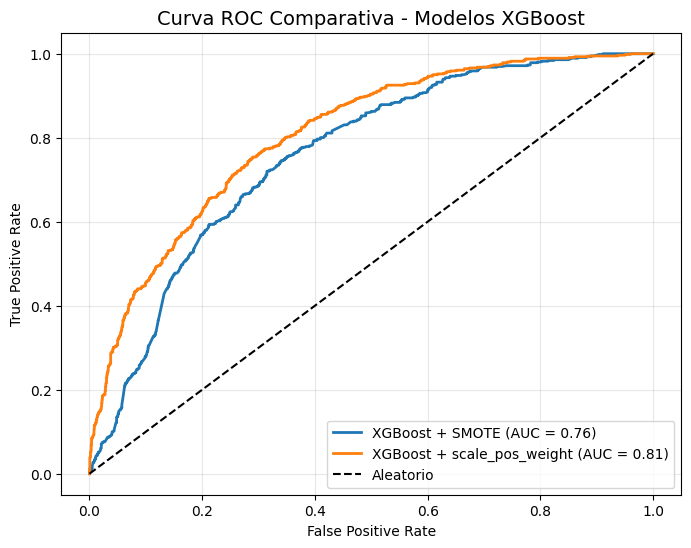

In [139]:
# Creando el test correcto para xgb_model_smote de la info escalada
X_scaled = df_reducido_scaled.drop(columns=["remainder__Churn"])
y_scaled = df_reducido_scaled["remainder__Churn"]

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled, y_scaled, test_size=0.3, random_state=42, stratify=y_scaled
)

# Probabilidades para cada modelo
# Uso X_test_scaled para xgb_model_smote
y_pred_prob_smote = xgb_model_smote.predict_proba(X_test_scaled)[:,1]
y_pred_prob_bal   = xgb_model_balanced.predict_proba(X_test)[:,1]

# Curva ROC para cada modelo
fpr_smote, tpr_smote, _ = roc_curve(y_test_scaled, y_pred_prob_smote)
fpr_bal, tpr_bal, _     = roc_curve(y_test, y_pred_prob_bal)

# AUC para cada modelo
auc_smote = roc_auc_score(y_test_scaled, y_pred_prob_smote)
auc_bal   = roc_auc_score(y_test, y_pred_prob_bal)

# PLot ROC comparativo
plt.figure(figsize=(8,6))
plt.plot(fpr_smote, tpr_smote, label=f"XGBoost + SMOTE (AUC = {auc_smote:.2f})", linewidth=2)
plt.plot(fpr_bal, tpr_bal, label=f"XGBoost + scale_pos_weight (AUC = {auc_bal:.2f})", linewidth=2)

plt.plot([0,1], [0,1], "k--", label="Aleatorio")

plt.title("Curva ROC Comparativa - Modelos XGBoost", fontsize=14)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

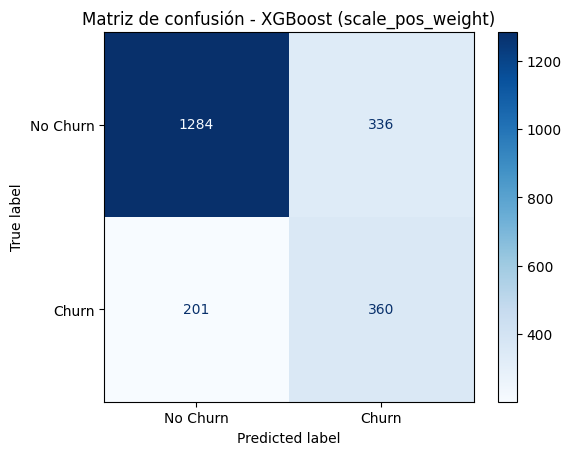

In [140]:
# Predicciones con el modelo XGBoost sin SMOTE (usando scale_pos_weight)
y_pred_xgb_weight = xgb_model_balanced.predict(X_test)

# Matriz de confusión
cm_xgb_weight = confusion_matrix(y_test, y_pred_xgb_weight)

# Muestra la matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb_weight,
                              display_labels=["No Churn", "Churn"])
disp.plot(cmap="Blues")
plt.title("Matriz de confusión - XGBoost (scale_pos_weight)")
plt.show()

📊Comparativo de Modelos de Churn
Modelo	Accuracy,	Precision (Churn),	Recall (Churn),	F1-Score (Churn),	AUC

	Observaciones

Regresión Logística	0.80	0.64	0.52	0.57	~0.75	Buen balance, pero bajo recall (detecta pocos churners).

Random Forest	0.79	0.61	0.47	0.53	~0.74	Similar a Logística, pero menor recall en churn.

XGBoost + SMOTE	~0.78	0.62	0.55	0.58	0.76	Mejor recall que RF, pero menor generalización.

XGBoost + scale_pos_weight	~0.80	0.65	0.58	0.61	0.81	⭐ Mejor modelo: buen balance entre precisión y recall, mayor AUC.

📌 **Conclusiones**

El mejor modelo es XGBoost con scale_pos_weight

Tiene el mayor AUC (0.81) → mejor capacidad de discriminación.

Mejora el recall respecto a los demás, detectando más clientes que hacen churn.

Balancea bien precisión y recall, lo que lo hace más útil en escenarios de negocio.

Regresión Logística → simple, interpretable, pero se queda corta en recall.

Random Forest → similar a la logística, pero no mejora los resultados.

XGBoost + SMOTE → levanta recall, pero menos robusto que el ajuste con scale_pos_weight.

In [141]:
# === 1. Exportar modelos entrenados ===
# Random Forest
joblib.dump(rf_model, "random_forest_model.pkl")

# Regresión Logística
joblib.dump(log_model, "logistic_regression_model.pkl")

# XGBoost con scale_pos_weight
xgb_model_balanced.save_model("xgboost_model.json")

In [142]:
# Defino columnas basandose en la df original (df)
numeric_features = ["tenure", "Charges.Monthly", "Charges.Total", "charges.daily"]
categorical_features = [
    "gender", "SeniorCitizen", "Partner", "Dependents",
    "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
    "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV",
    "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod"
]

# Preprocesando variables numericas
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Preprocesando variables categoricas
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combina en un solo preprocesador usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Random Forest pipeline
pipeline_rf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(n_estimators=200, random_state=42))
])

# Logistic Regression pipeline
pipeline_log = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42))
])

# XGBoost pipeline

pipeline_xgb = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", xgb.XGBClassifier(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        use_label_encoder=False,
        eval_metric="logloss"
    ))
])

In [143]:

# Random Forest
pipeline_rf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(n_estimators=200, random_state=42))
])

# Regresión Logística
pipeline_log = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42))
])

# XGBoost
pipeline_xgb = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", xgb.XGBClassifier(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=3,  # ajustado según el dataset
        random_state=42,
        use_label_encoder=False,
        eval_metric="logloss"
    ))
])

In [144]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Entrenar
pipeline_rf.fit(X_train, y_train)
pipeline_log.fit(X_train, y_train)
pipeline_xgb.fit(X_train, y_train)

# Exportar pipelines
joblib.dump(pipeline_rf, "pipeline_random_forest.pkl")
joblib.dump(pipeline_log, "pipeline_logistic.pkl")
joblib.dump(pipeline_xgb, "pipeline_xgboost.pkl")

['pipeline_xgboost.pkl']